In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('../parameters.sh')
source('parameters.sh')


In [3]:
devtools::load_all(multiSnpnet_src_d)


Loading multiSnpnet



In [4]:
load(file.path(RData_d, results_sub_d, paste0(rdata_base, '.RData')))


In [5]:
svd_C <- tsvd_of_C_with_names(fit, rank=rank)


## Importance of the components (scree plot and trait squared cosine score)


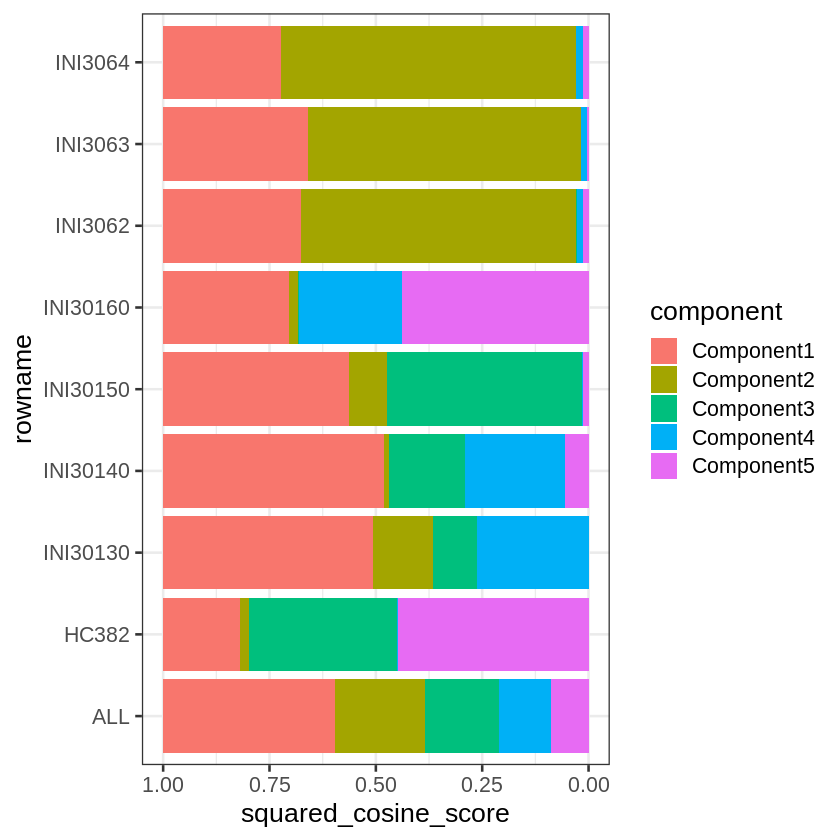

In [6]:
((((svd_C$u) %*% diag(svd_C$d)) ** 2) / rowSums(((svd_C$u) %*% diag(svd_C$d)) ** 2)) %>%
as.data.frame() %>% rownames_to_column() %>%
gather(component, squared_cosine_score, -rowname) %>%
mutate(component = str_replace(component, '^V', 'Component')) %>%
bind_rows(
    ((svd_C$d ** 2) / sum(svd_C$d ** 2) ) %>%
    enframe(name = 'component', value='squared_cosine_score') %>%
    mutate(rowname = 'ALL')
) %>%
ggplot(aes(fill=component, y=squared_cosine_score, x=rowname)) + 
geom_bar(position="stack", stat="identity") +
theme_bw(base_size=16) +
coord_flip() + scale_y_reverse()


## Trait contribution score

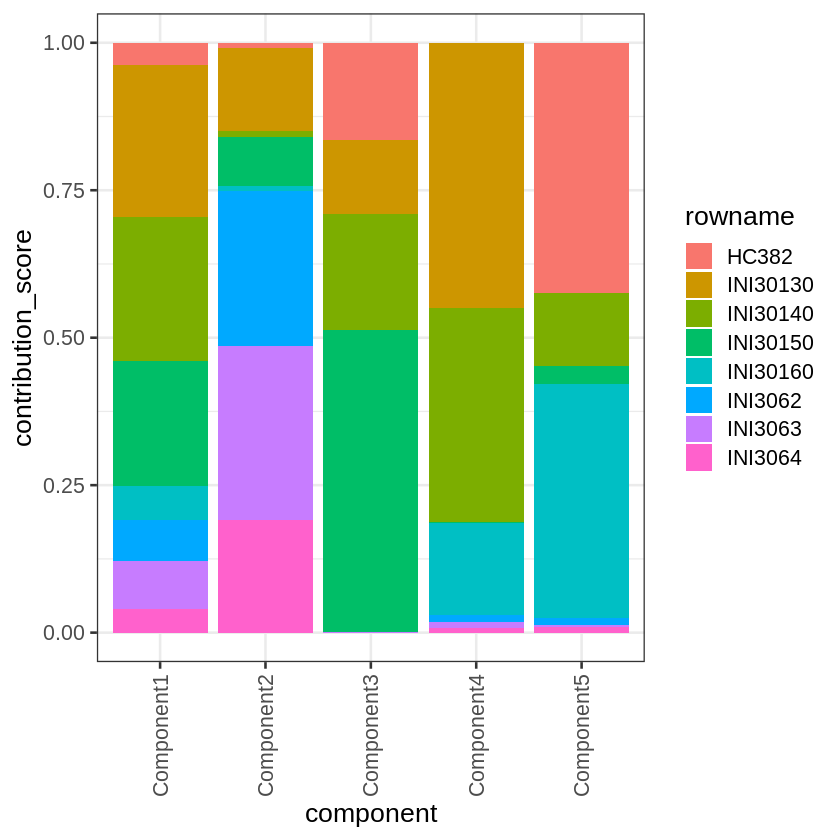

In [7]:
(svd_C$u ** 2) %>% 
as.data.frame() %>% rownames_to_column() %>%
gather(component, contribution_score, -rowname) %>%
ggplot(aes(fill=rowname, y=contribution_score, x=component)) + 
geom_bar(position="stack", stat="identity") +
theme_bw(base_size=16) +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [9]:
component_idx <- 1
top_k_variants <- 10

In [16]:
head(sort((svd_C$v[,component_idx]) ** 2, decreasing=TRUE), top_k_variants)

rs79490353_C      rs445_T  rs4667283_T rs17758695_T  rs2228467_C  rs1800973_A 
 0.044543022  0.023738490  0.010748501  0.010390678  0.009259302  0.006928166 
 rs3184504_C rs34856868_A rs34210653_A  rs8078723_C 
 0.006338747  0.006204216  0.006182898  0.005797099

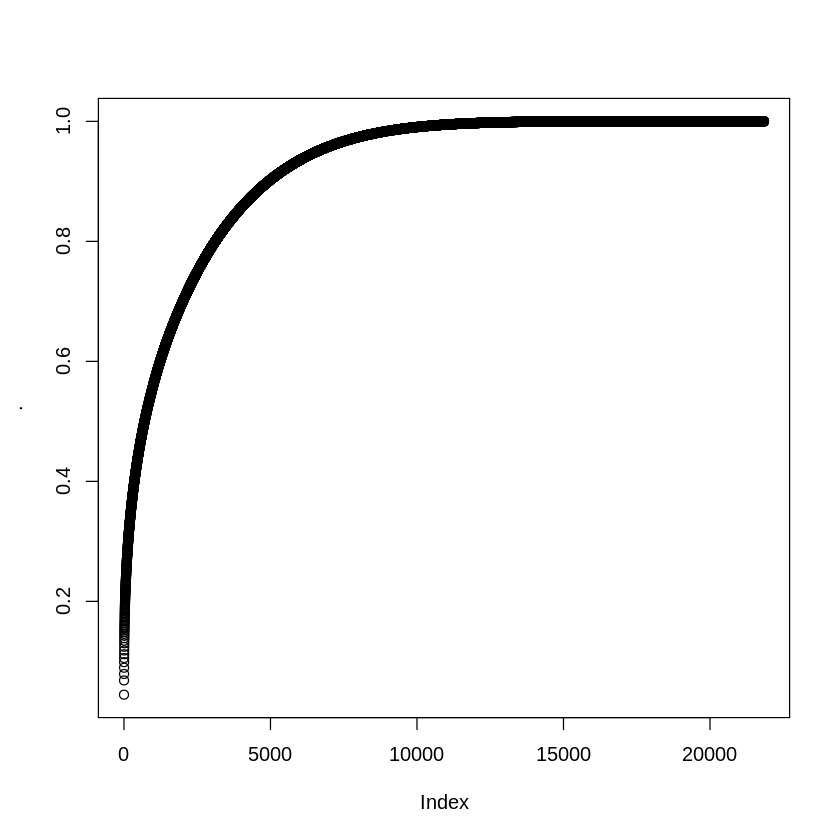

In [17]:
cumsum(sort((svd_C$v[,component_idx]) ** 2, decreasing=TRUE)) %>% plot()